In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.shape

(214, 10)

<AxesSubplot:>

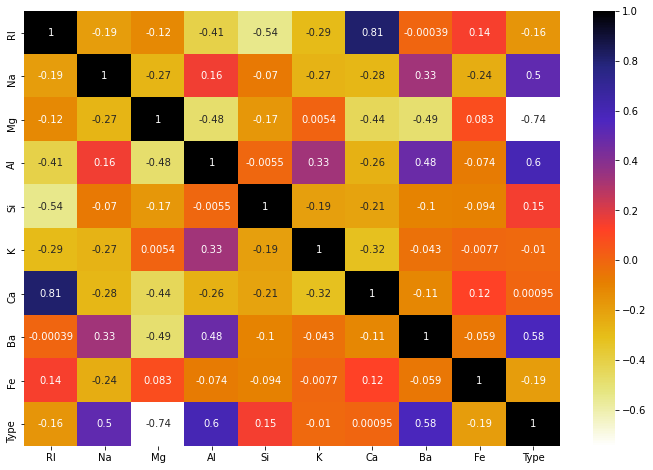

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)

In [45]:
## Function to find the highly correlated variable 
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
         for j in range(i):
                if (corr_matrix.iloc[i,j])>threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [9]:
corr = correlation(df, 0.7)
len(corr)

1

In [10]:
corr

{'Ca'}

In [11]:
## drop the highly correlated features
df.drop(corr, axis=1, inplace=True)

In [12]:
df[:2]

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,1


<AxesSubplot:>

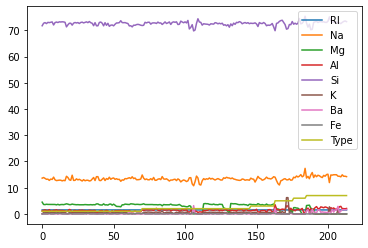

In [13]:
df.plot()

## train test dAta

In [14]:
train = df.drop('Type',axis=1)
test = df.Type

## Standardize the Variables

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(train)

StandardScaler()

In [18]:
scaler_feature = scaler.transform(train)

In [19]:
scaler_feature[:4]

array([[ 0.87286765,  0.28495326,  1.25463857, -0.69244192, -1.12708201,
        -0.67170546, -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, -0.17046023,  0.10231907,
        -0.02621325, -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249,  0.19091171,  0.43878673,
        -0.16453301, -0.35287683, -0.5864509 ],
       [-0.23283051, -0.24285268,  0.69870999, -0.31099376, -0.0529737 ,
         0.11210651, -0.35287683, -0.5864509 ]])

In [20]:
new_train = pd.DataFrame(scaler_feature, columns=df.columns[:-1])

In [21]:
new_train.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.352877,-0.586451


## pair plot

In [22]:
import seaborn as sns

C:\Users\saurav\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\saurav\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\saurav\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


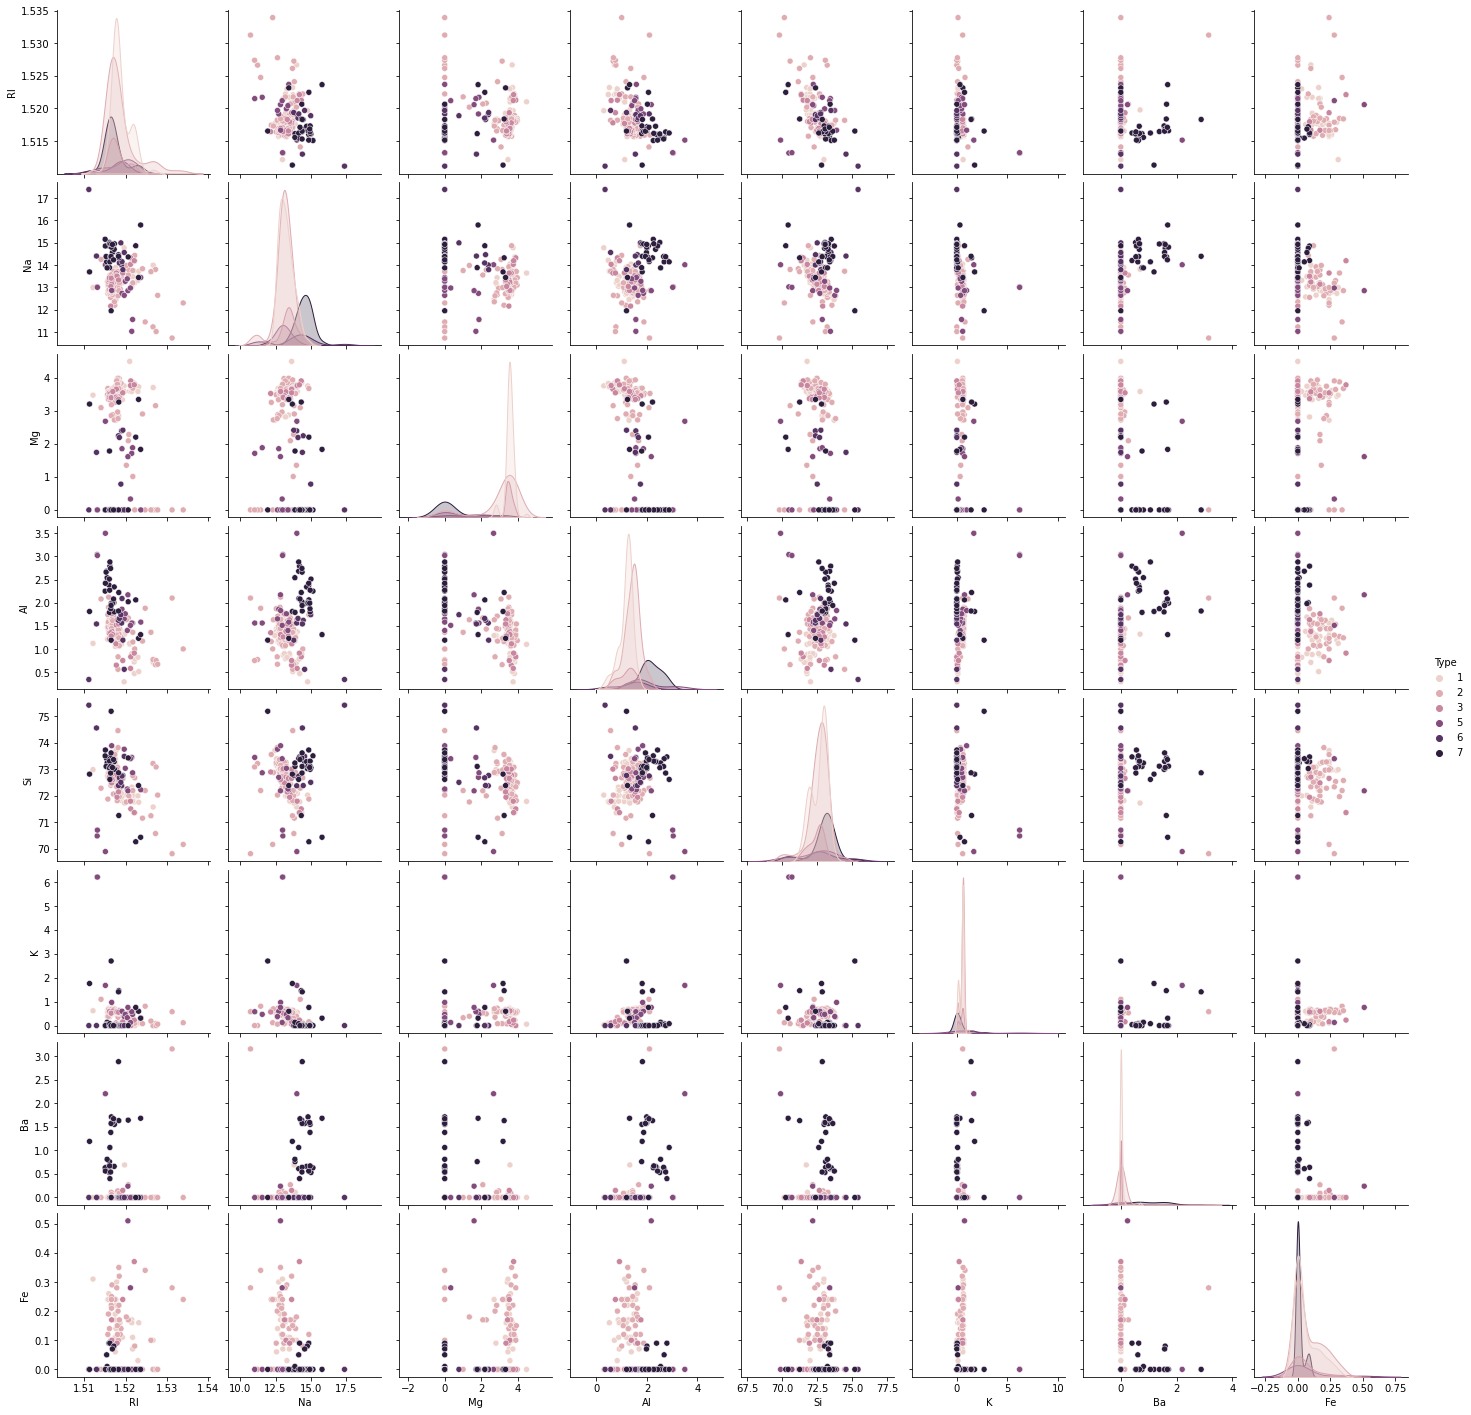

In [23]:
sns.pairplot(df, hue='Type')

## spliting the data by train_test_split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(new_train, test, test_size=0.30)

## Using K-NN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model = KNeighborsClassifier(n_neighbors=3)

In [28]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
pred = model.predict(X_test)
pred

array([7, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 7, 2, 1, 3, 1, 7, 1, 2, 7, 5,
       2, 1, 2, 1, 7, 2, 1, 6, 2, 1, 1, 1, 5, 2, 7, 1, 2, 1, 2, 1, 2, 3,
       7, 7, 7, 2, 6, 2, 1, 2, 1, 7, 2, 5, 7, 5, 2, 2, 2, 1, 1, 1, 6],
      dtype=int64)

In [30]:
model.score(X_test, y_test)

0.7384615384615385

## build the confusion Matrix

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(y_test, pred))

[[17  4  1  0  0  0]
 [ 5 15  1  1  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  3  0]
 [ 0  0  0  1  0 11]]


## Find the Best K Value

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
## Find the best Equracy rate
accuracy_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, new_train, test, cv=10)
    accuracy_rate.append(score.mean())

C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-p

C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-p

In [35]:
## find the Error rate
## Find the best Equracy rate
error = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, new_train, test, cv=10)
    error.append(1- score.mean())

C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-p

C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saurav\anaconda3\lib\site-p

In [36]:
error[:4]

[0.35584415584415574,
 0.33658008658008653,
 0.2993506493506495,
 0.3084415584415584]

In [37]:
## error rate2 
## Find the best Equracy rate
error = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test)) 

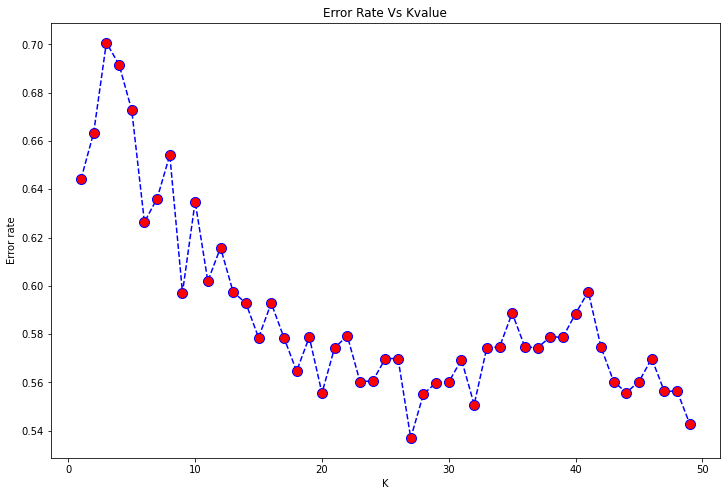

In [38]:
plt.figure(figsize=(12,8))
#plt.plot(range(1,50),error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.plot(range(1,50),accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate Vs Kvalue')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

## we found 3 is the best K vlue


# now k nabhor is 3 then build the model again

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [40]:
Knn2 = KNeighborsClassifier(n_neighbors=3)

In [41]:
Knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
pred2 = Knn2.predict(X_test)

In [43]:
print(f"With K=3 \n{confusion_matrix(y_test, pred2)}\n{classification_report(y_test, pred2)}")

With K=3 
[[17  4  1  0  0  0]
 [ 5 15  1  1  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  3  0]
 [ 0  0  0  1  0 11]]
              precision    recall  f1-score   support

           1       0.77      0.77      0.77        22
           2       0.65      0.68      0.67        22
           3       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         2
           6       1.00      0.75      0.86         4
           7       1.00      0.92      0.96        12

    accuracy                           0.74        65
   macro avg       0.65      0.69      0.65        65
weighted avg       0.74      0.74      0.74        65



In [44]:
accuracy_score(y_test, pred2)

0.7384615384615385